In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getDf():
    files = {}
    for size in [1500000, 1800000, 2500000, 2800000, 3500000, 3800000 ]:
        for b in ["true", "false"]:
            with open("../result/resultRustOwnerType_init_{}_{}.txt".format(b, size), "r") as f:
                files["size_{}_init_{}".format(size, b)] = [s.strip().split("#") for s in f.readlines()]

    dfs = {}
    header = None
    for k in files.keys():
        df = pd.DataFrame(files[k])
        header = df.iloc[0]
        df = df[1:]
        df.columns = header
        dfs[k] = df

    data = pd.DataFrame(columns=header)
    for s in [ 1500000, 1800000, 2500000, 2800000, 3500000, 3800000]:
        for b in ["true", "false"]:
            data = pd.concat([data, dfs["size_{}_init_{}".format(s, b)]])
            data = data.astype({"datastructure": str, "init": str ,"size": int, "field": str, "createtime":int,  \
                        'accesstime': int,"totaltime": int})
    return data

In [3]:
df = getDf()

In [4]:
df

,datastructure,init,size,field,createtime,accesstime,totaltime
1,[RustVector],true,1500000,"""own""",422,12454,14557
2,[RustVector],true,1500000,"""own""",317,12590,14593
3,[RustVector],true,1500000,"""own""",315,10513,12499
4,[RustVector],true,1500000,"""own""",316,9168,11172
5,[RustVector],true,1500000,"""own""",312,11647,13648
...,...,...,...,...,...,...,...
11,[RustVector],false,3800000,"""slice""",442,66764,71723
12,[RustVector],false,3800000,"""slice""",449,64959,69936
13,[RustVector],false,3800000,"""slice""",453,65040,70011
14,[RustVector],false,3800000,"""slice""",443,64758,69729


In [5]:
df_avg = df.groupby(["size", "init"]).mean().reset_index()

In [6]:
df_avg

,size,init,createtime,accesstime,totaltime
0,1500000,false,206.466667,10084.866667,12002.666667
1,1500000,true,202.000000,10541.600000,12428.533333
2,1800000,false,248.733333,12165.333333,14502.466667
3,1800000,true,237.266667,13397.800000,15685.400000
4,2500000,false,346.066667,21887.866667,25143.933333
5,2500000,true,327.200000,16384.666667,19573.600000
6,2800000,false,383.400000,39599.333333,43255.333333
7,2800000,true,368.933333,18686.333333,22297.600000
8,3500000,false,476.800000,57913.133333,62515.600000
9,3500000,true,458.266667,23116.000000,27681.733333


In [7]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, round(height, 3)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


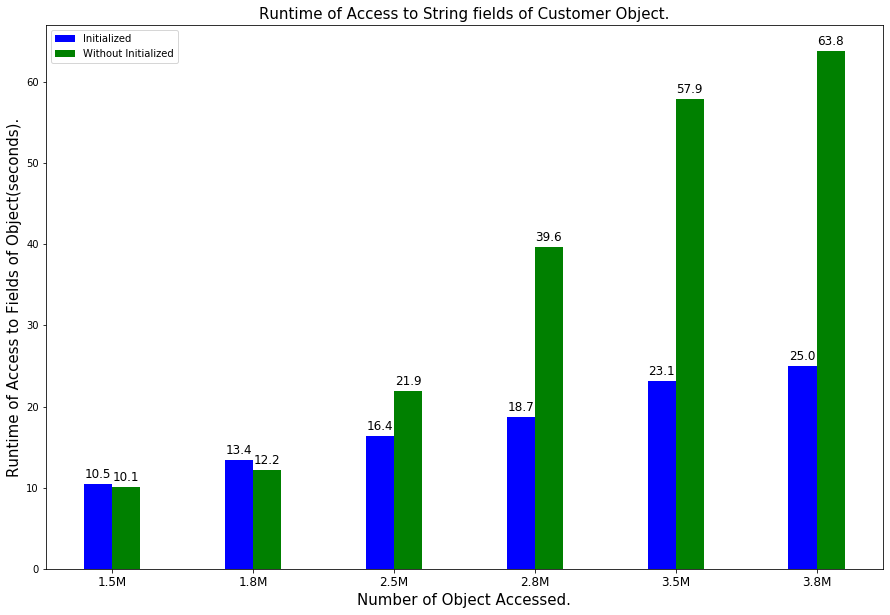

In [9]:
init = df_avg[df_avg["init"] == 'true']
without_init = df_avg[df_avg["init"] == 'false']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w/2, round(init["accesstime"] / 1000, 1), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w/2, round(without_init["accesstime"] / 1000, 1), width = w, color ='g', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(n) + "M" for n in (label / 1000000)], fontsize = 12)
ax.set_xlabel("Number of Object Accessed.", fontsize = 15)
ax.set_ylabel("Runtime of Access to Fields of Object(seconds).", fontsize = 15)
ax.set_title("Runtime of Access to String fields of Customer Object.", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Initialized", "Without Initialized"))
#ax.set_yscale('log')
fig.savefig("rust_access_init_vs_noint.eps")
#fig.savefig("rust_borrowing.png")
plt.show()

In [13]:
init_v = init["accesstime"].values
noinit_v = without_init["accesstime"].values

In [18]:
((noinit_v - init_v) / noinit_v) * 100

array([ -4.52889808, -10.13097326,  25.14269702,  52.81149514,
        60.08504692,  60.76868304])